In [1]:
#import required libraries
import matplotlib.pyplot as plt
import numpy as np
import shutil
%matplotlib inline
import os
import skimage.io as io
import os

In [2]:
import skimage
def _read_img(image_path):
    img = skimage.io.imread(image_path, plugin='tifffile')
    return img

In [ ]:
imdir = r"C:\Users\CBS-7\Desktop\WV-3\WV-3\classified\Kestel_classified_Mask.tif"

In [ ]:
IM = io.imread(imdir)

In [ ]:
IM.shape

In [ ]:
IM.dtype

In [ ]:
a, b = np.unique(IM, return_counts= True)

In [ ]:
a,b

In [3]:
labels = ['NoData',
          'Permanent crops',
           'Road and Rail',
           'Arable Land',
            'Industrial or commercial units',
            'Inland waters',
             'Mine dump and construction sites',
            'Forest',
            'Artificial and non agricultural veg areas',
            'Shrub and/or herbaceous vegetation associations',
             'Discontinious urban fabric',
             'Heteregonous agricultural areas',
             'Continious urban fabric'
               ] 

palette ={ 0 : (0,0,0), #no data
           1 : (231, 40, 252), #permenant crops###
           2 : (204, 0, 0),  #road and rail###
           3 : (255, 255, 168), #arable land ###
           4 : (204, 77, 242),  #idustrial or commercial units
           5 : (0, 204, 242), #inland waters###
           6 : (166, 0, 204), #mine dump and construction sites########
           7 : (128, 255, 0), #forest######
           8 : (255, 166, 255), #artifical and non agricultural veg areas ####
           9 : (204, 242, 77), #shrub and or herbaceous vegetation assucations#####
           10 : (255, 0, 0), #discontinious urban fabric#####
           11 : (255,230,166), #heteregonous agricultural areas###
           12 : (230, 0, 77), #continious urban ####
         }

invert_palette = {v: k for k, v in palette.items()}

def convert_to_color(arr_2d, palette=palette):
    """ Numeric labels to RGB-color encoding """
    arr_3d = np.zeros((arr_2d.shape[0], arr_2d.shape[1], 3), dtype=np.uint8)

    for c, i in palette.items():
        m = arr_2d == c
        arr_3d[m] = i

    return arr_3d

def convert_from_color(arr_3d, palette=invert_palette):
    """ RGB-color encoding to grayscale labels """
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)

    for c, i in palette.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
        arr_2d[m] = i

    return arr_2d

In [4]:
colored_mask = convert_to_color(IM)

NameError: name 'IM' is not defined

In [ ]:
plt.imshow(colored_mask)

In [5]:
save_path = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Kestel\colored_mask\GT_colored.tif"

In [6]:
io.imsave(save_path, colored_mask) #no CRS 

NameError: name 'colored_mask' is not defined

In [ ]:
#### 360 ilk başta, silmeden önce 265

In [7]:
# helper function for data visualization
def visualize_in_one_row(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
    

def visualize(image):
    # Divide all values by 65535 so we can display the image using matplotlib
    image = image / 65535
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image, cmap = 'Greys_r')

In [8]:
import tifffile

In [9]:
class Dataset():
    
    def __init__(
            self, 
            optic_dir,
            mask_dir):
        
        self.optic_ids = os.listdir(optic_dir)
        self.mask_ids = os.listdir(mask_dir)
        
        self.optic_fps = [os.path.join(optic_dir, image_id) for image_id in self.optic_ids]
        self.masks_fps = [os.path.join(mask_dir, image_id) for image_id in self.mask_ids]
        
    def __getitem__(self, i):
        
        optic_id = self.optic_fps[i].split('\\')[-1]
        mask_id = self.masks_fps[i].split('\\')[-1]
        
        optic = tifffile.imread(self.optic_fps[i])
        mask = tifffile.imread(self.masks_fps[i])

        return optic, mask
    
    def __len__(self):
        return len(self.mask_ids)

In [55]:
#dataset_dir = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Kestel\Patches"
dataset_dir = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches"

m_dir = os.path.join(dataset_dir, "Masks", "tif")
o_dir = os.path.join(dataset_dir, "Images", "tif")

In [56]:
viz_dataset = Dataset(optic_dir = o_dir, 
                        mask_dir = m_dir)

In [57]:
optic, mask = viz_dataset[np.random.randint(len(viz_dataset))]

In [58]:
optic.dtype, optic.shape, optic.max()

(dtype('uint16'), (512, 512, 4), 1651)

In [59]:
mask.dtype, mask.shape, mask.max()

(dtype('uint8'), (512, 512, 3), 255)

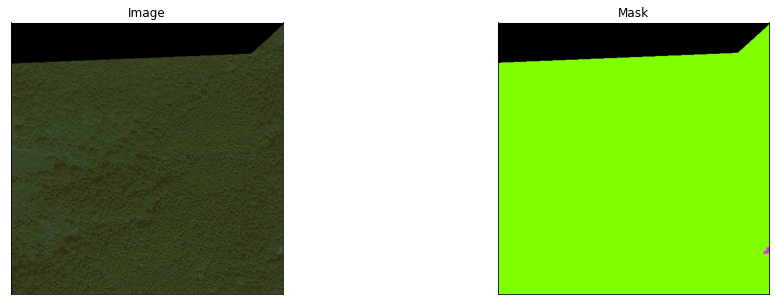

In [156]:
def scale_range(input, min, max):
    input += -(np.min(input))
    input /= (1e-9 + np.max(input) / (max - min + 1e-9))
    input += min
    return input

optic, mask = viz_dataset[np.random.randint(len(viz_dataset))]

visualize_in_one_row(Image = scale_range(optic.astype('float'), 0, 255)[...,:3].astype(np.uint8) ,
           mask = mask)

In [ ]:
optic.shape, optic.dtype, mask.shape, mask.dtype

# SPLIT THE PATCHES INTO TRAIN VAL AND TEST RANDOMLY

## Delete non square and empty masks with sar and optic correspondings 

In [157]:
import os
import skimage.io
import numpy as np
import glob
import shutil


## bırlesık --> 1317->817

In [ ]:
#original
def _read_img(image_path):
    img = skimage.io.imread(image_path, plugin='tifffile')
    return img

deleted_ids = []

path = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches\Masks\tif"
for filename in os.listdir(path):
    img = _read_img(path + '\\' + filename)
    sum_of_pixels = np.sum(img)
    if sum_of_pixels == 0 or img.shape[0] != img.shape[1]:
        last = filename.split('.')[0].split('_')[-1]
        #before = filename.split('.')[0].split('_')[-2]
        #id_ = before + '_' + last
        id_ = last
        
        deleted_ids.append(id_)
        os.remove(path + '\\' + filename)

In [ ]:
deleted_ids

In [ ]:
len(deleted_ids) # IKISI İÇİN DE OLAN  1317 -> 864

## 360--> 265

In [ ]:
for i in range(len(os.listdir(r"C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches\Images\tif"))):
    print(deleted_ids[i])
    
    for fileloc in glob.iglob(r'C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches\Images\tif\{}.tif'.format(deleted_ids[i])):
        os.remove(fileloc)

### Split  

In [158]:
import os

In [159]:
ids__ = os.listdir(r"C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches\Masks\tif")
all_ids = []

for x,i in enumerate(ids__):
    print(ids__)
    all_ids.append(ids__[x])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [160]:
len(all_ids)

1219

In [161]:
import numpy as np

val_ratio = 0.2
test_ratio = 0.1

np.random.seed(5) #5 vardı sanırım 3 için
np.random.shuffle(all_ids)

train_FileNames, val_FileNames, test_FileNames = np.split(np.array(all_ids),
                                                              [int(len(all_ids)* (1 - (val_ratio + test_ratio))), 
                                                               int(len(all_ids)* (1 - test_ratio))])

In [162]:
len(train_FileNames), len(val_FileNames), len(test_FileNames)

(853, 244, 122)

In [163]:
len(train_FileNames)

853

In [164]:
dirr_mask =r"C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches\Masks\tif"

_all_fn_train = ['{}'.format(name) for name in train_FileNames]
_all_fn_val = ['{}'.format(name) for name in val_FileNames]
_all_fn_test = ['{}'.format(name) for name in test_FileNames]

train_mask = [os.path.join(dirr_mask, _all_fn_train[i]) for i, name in enumerate(train_FileNames)]
val_mask = [os.path.join(dirr_mask, _all_fn_val[i]) for i, name in enumerate(val_FileNames)]
test_mask = [os.path.join(dirr_mask, _all_fn_test[i]) for i, name in enumerate(test_FileNames)]
#train_mask

In [165]:
dirr_optic = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches\Images\tif"

all_fn_train_ = ['{}'.format(name) for name in train_FileNames]
all_fn_val_ = ['{}'.format(name) for name in val_FileNames]
all_fn_test_ = ['{}'.format(name) for name in test_FileNames]

train_optic = [os.path.join(dirr_optic, all_fn_train_[i]) for i, name in enumerate(train_FileNames)]
val_optic = [os.path.join(dirr_optic, all_fn_val_[i]) for i, name in enumerate(val_FileNames)]
test_optic = [os.path.join(dirr_optic, all_fn_test_[i]) for i, name in enumerate(test_FileNames)]

In [166]:
#ORIGINAL ONE
import shutil

root_dir = r'C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Dataset' # data root path
classes_dir = ['Dataset'] #total labels

val_ratio = 0.2
test_ratio = 0.1

for cls in classes_dir:

    src = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches\Images\tif"

    allFileNames = os.listdir(src)

    np.random.shuffle(allFileNames)

    train_FileNames = train_optic
    val_FileNames = val_optic
    test_FileNames = test_optic

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, (os.path.join(root_dir,'Train','Image')))

    for name in val_FileNames:
        shutil.copy(name, (os.path.join(root_dir,'Validation','Image')))

    for name in test_FileNames:
        shutil.copy(name,(os.path.join(root_dir,'Test','Image')))

Total images:  1219
Training:  853
Validation:  244
Testing:  122


In [167]:
#ORIGINAL ONE

root_dir = r'C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Dataset' # data root path
classes_dir = ['Dataset'] #total labels

val_ratio = 0.2
test_ratio = 0.1

for cls in classes_dir:

    src = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches\Masks\tif"

    allFileNames = os.listdir(src)

    np.random.shuffle(allFileNames)

    train_FileNames = train_mask
    val_FileNames = val_mask
    test_FileNames = test_mask

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, (os.path.join(root_dir,'Train','Mask')))

    for name in val_FileNames:
        shutil.copy(name, (os.path.join(root_dir,'Validation','Mask')))

    for name in test_FileNames:
        shutil.copy(name,(os.path.join(root_dir,'Test','Mask')))

Total images:  1219
Training:  853
Validation:  244
Testing:  122


### END


## Dataset Check

In [ ]:
labels = ['NoData',
          'Permanent crops',
           'Road and Rail',
           'Arable Land',
            'Industrial or commercial units',
            'Inland waters',
             'Mine dump and construction sites',
            'Forest',
            'Artificial and non agricultural veg areas',
            'Shrub and/or herbaceous vegetation associations',
             'Discontinious urban fabric',
             'Heteregonous agricultural areas',
             'Continious urban fabric'
               ] 

palette ={ 0 : (0,0,0), #no data
           1 : (231, 40, 252), #permenant crops###
           2 : (204, 0, 0),  #road and rail###
           3 : (255, 255, 168), #arable land ###
           4 : (204, 77, 242),  #idustrial or commercial units
           5 : (0, 204, 242), #inland waters###
           6 : (166, 0, 204), #mine dump and construction sites########
           7 : (128, 255, 0), #forest######
           8 : (255, 166, 255), #artifical and non agricultural veg areas ####
           9 : (204, 242, 77), #shrub and or herbaceous vegetation assucations#####
           10 : (255, 0, 0), #discontinious urban fabric#####
           11 : (255,230,166), #heteregonous agricultural areas###
           12 : (230, 0, 77), #continious urban ####
         }

invert_palette = {v: k for k, v in palette.items()}

def convert_to_color(arr_2d, palette=palette):
    """ Numeric labels to RGB-color encoding """
    arr_3d = np.zeros((arr_2d.shape[0], arr_2d.shape[1], 3), dtype=np.uint8)

    for c, i in palette.items():
        m = arr_2d == c
        arr_3d[m] = i

    return arr_3d

def convert_from_color(arr_3d, palette=invert_palette):
    """ RGB-color encoding to grayscale labels """
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)

    for c, i in palette.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
        arr_2d[m] = i

    return arr_2d

# helper function for data visualization
def visualize_in_one_row(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
    
def scale_range(input, min, max):
    input += -(np.min(input))
    input /= (1e-9 + np.max(input) / (max - min + 1e-9))
    input += min
    return input

def show_image(im,target_file): #PCG
      if len(im.shape) == 2:
        im = scale_range(im, 0, 255).astype(np.uint8)
        plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')
        plt.imshow(im,cmap='gray')
        plt.show()

      elif len(im.shape) == 3:
        im = np.array([scale_range(i, 0, 255) for i in im.transpose((2,0,1))]).transpose(1,2,0)[...,:3].astype(np.uint8)
        plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')
        plt.savefig(target_file, format = 'png', dpi =80,  transparent = True, bbox_inches = 'tight', pad_inches = 0)
        plt.imshow(im)
        plt.show()

In [ ]:
import os
import numpy as np
import tifffile
from matplotlib import pyplot as plt

class Dataset():
    
    def __init__(
            self, 
            dataset_dir):
        
        self.dataset_dir = dataset_dir        
        self.train_dir = os.path.join(self.dataset_dir, 'Test')
            
        optic_dir = os.path.join(self.dataset_dir, 'Images','tif')
        mask_dir = os.path.join(self.dataset_dir, 'Masks','tif')
            
        self.optic_ids = os.listdir(optic_dir)
        self.mask_ids = os.listdir(mask_dir)

        self.optic_fps = [os.path.join(optic_dir, image_id) for image_id in self.optic_ids]
        self.mask_fps = [os.path.join(mask_dir, image_id) for image_id in self.mask_ids]
        print("Training set: {} image".format(len(self.optic_ids)))
            
    def __getitem__(self, i):
        
        optic = tifffile.imread(self.optic_fps[i])
        mask = tifffile.imread(self.mask_fps[i])
        
        return optic, mask
    
    def __len__(self):
        
        return len(self.mask_ids)
  

In [ ]:
dataset_dir = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches"

viz_dataset = Dataset(dataset_dir = dataset_dir)
mask_container = []

for i in range(len(viz_dataset)):
    optic, mask = viz_dataset[np.random.randint(len(viz_dataset))]
    converted_mask = convert_from_color(mask)
    mask_container.append(converted_mask)
    #print(converted_mask)
    visualize_in_one_row(Optical = scale_range(optic.astype('float'), 0, 255)[...,:3].astype(np.uint8),
                          Ground_Truth = mask)

#### COUNT CLASSES 

In [ ]:
masks = np.asarray(mask_container)

In [ ]:
masks.shape

In [ ]:
unique, counts = np.unique(masks, return_counts=True)
unique, counts, len(counts)

In [ ]:
unique

In [ ]:
counts

In [ ]:
a = counts/ sum(counts)
a*100

In [ ]:
def get_all_ids(path = r"C:\Users\CBS-7\Desktop\Tez\DATA\patches\mask", val_ratio = 0.2, test_ratio = 0.1): 
    ids__ = os.listdir(path)
    all_ids = []

    for x,i in enumerate(ids__):
        last = ids__[x].split('.')[0].split('_')[-1]
        before = ids__[x].split('.')[0].split('_')[-2]
        id_ = before + '_' + last
        all_ids.append(id_)
        
        np.random.shuffle(all_ids)

        train_, val_, test_ = np.split(np.array(all_ids), [int(len(all_ids)* (1 - (val_ratio + test_ratio))), 
                                                                       int(len(all_ids)* (1 - test_ratio))])
        return train_, val_, test_

def get_train_val_test_ids(root, mode = 'mask'):
    
    train__, val__, test__ = get_all_ids()
    print("trrr idss", train__)
    
    if mode == 'mask':
        
        get_im_IDs = os.path.join(root, 'mask')

        all_fn_train = ['MASK_Final_color_CROP_{}.tif'.format(name) for name in train__]
        all_fn_val = ['MASK_Final_color_CROP_{}.tif'.format(name) for name in val__]
        all_fn_test = ['MASK_Final_color_CROP_{}.tif'.format(name) for name in test__]

        train_ims = [os.path.join(get_im_IDs, all_fn_train[i]) for i, name in enumerate(train__)]
        val_ims = [os.path.join(get_im_IDs, all_fn_val[i]) for i, name in enumerate(val__)]
        test_ims = [os.path.join(get_im_IDs, all_fn_test[i]) for i, name in enumerate(test__)]

    if mode == 'optic':

        get_im_IDs = os.path.join(root, 'optic')

        all_fn_train = ['cropped_optic_{}.tif'.format(name) for name in train__]
        all_fn_val = ['cropped_optic_{}.tif'.format(name) for name in val__]
        all_fn_test = ['cropped_optic_{}.tif'.format(name) for name in test__]

        train_ims = [os.path.join(get_im_IDs, all_fn_train[i]) for i, name in enumerate(train__)]
        val_ims = [os.path.join(get_im_IDs, all_fn_val[i]) for i, name in enumerate(val__)]
        test_ims = [os.path.join(get_im_IDs, all_fn_test[i]) for i, name in enumerate(test__)]
        
    if mode == 'SAR':
    
        get_im_IDs = os.path.join(root, 'sar')

        all_fn_train = ['cropped_sar_{}.tif'.format(name) for name in train__]
        all_fn_val = ['cropped_sar_{}.tif'.format(name) for name in val__]
        all_fn_test = ['cropped_sar_{}.tif'.format(name) for name in test__]

        train_ims = [os.path.join(get_im_IDs, all_fn_train[i]) for i, name in enumerate(train__)]
        val_ims = [os.path.join(get_im_IDs, all_fn_val[i]) for i, name in enumerate(val__)]
        test_ims = [os.path.join(get_im_IDs, all_fn_test[i]) for i, name in enumerate(test__)]
        
        return train_ims, val_ims, test_ims

def split_dataset(source_dir, target_dir, modalities):
    

    src = os.path.join(source_dir, modalities) 

    allFileNames = os.listdir(src)

    np.random.shuffle(allFileNames)

    if modalities == 'mask':
        x, y, z = get_train_val_test_ids(root = source_dir, mode='mask')
        
    if modalities == 'optic':
        x, y, z = get_train_val_test_ids(root = source_dir, mode='optic')
            
    if modalities == 'sar':
        x, y, z = get_train_val_test_ids(root = source_dir, mode='sar')

            
    print('Total images: ', len(allFileNames))
    print('Training: ', len(x))
    print('Validation: ', len(y))
    print('Testing: ', len(z))

    # Copy-pasting images
    for name in x:
        shutil.copy(name, (os.path.join(target_dir,'train',modalities)))

    for name in y:
        shutil.copy(name, (os.path.join(target_dir,'val',modalities)))

    for name in z:
        shutil.copy(name,(os.path.join(target_dir,'test',modalities)))
        
        
import os
import skimage.io
import numpy as np
import glob
import shutil

source_dir = r"C:\Users\CBS-7\Desktop\Tez\DATA\patches"
target_dir = r'C:\Users\CBS-7\Desktop\Tez\DATA\dataset2' # Where to save? 

split_dataset(source_dir = source_dir, target_dir = target_dir , modalities = 'mask')

In [1]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

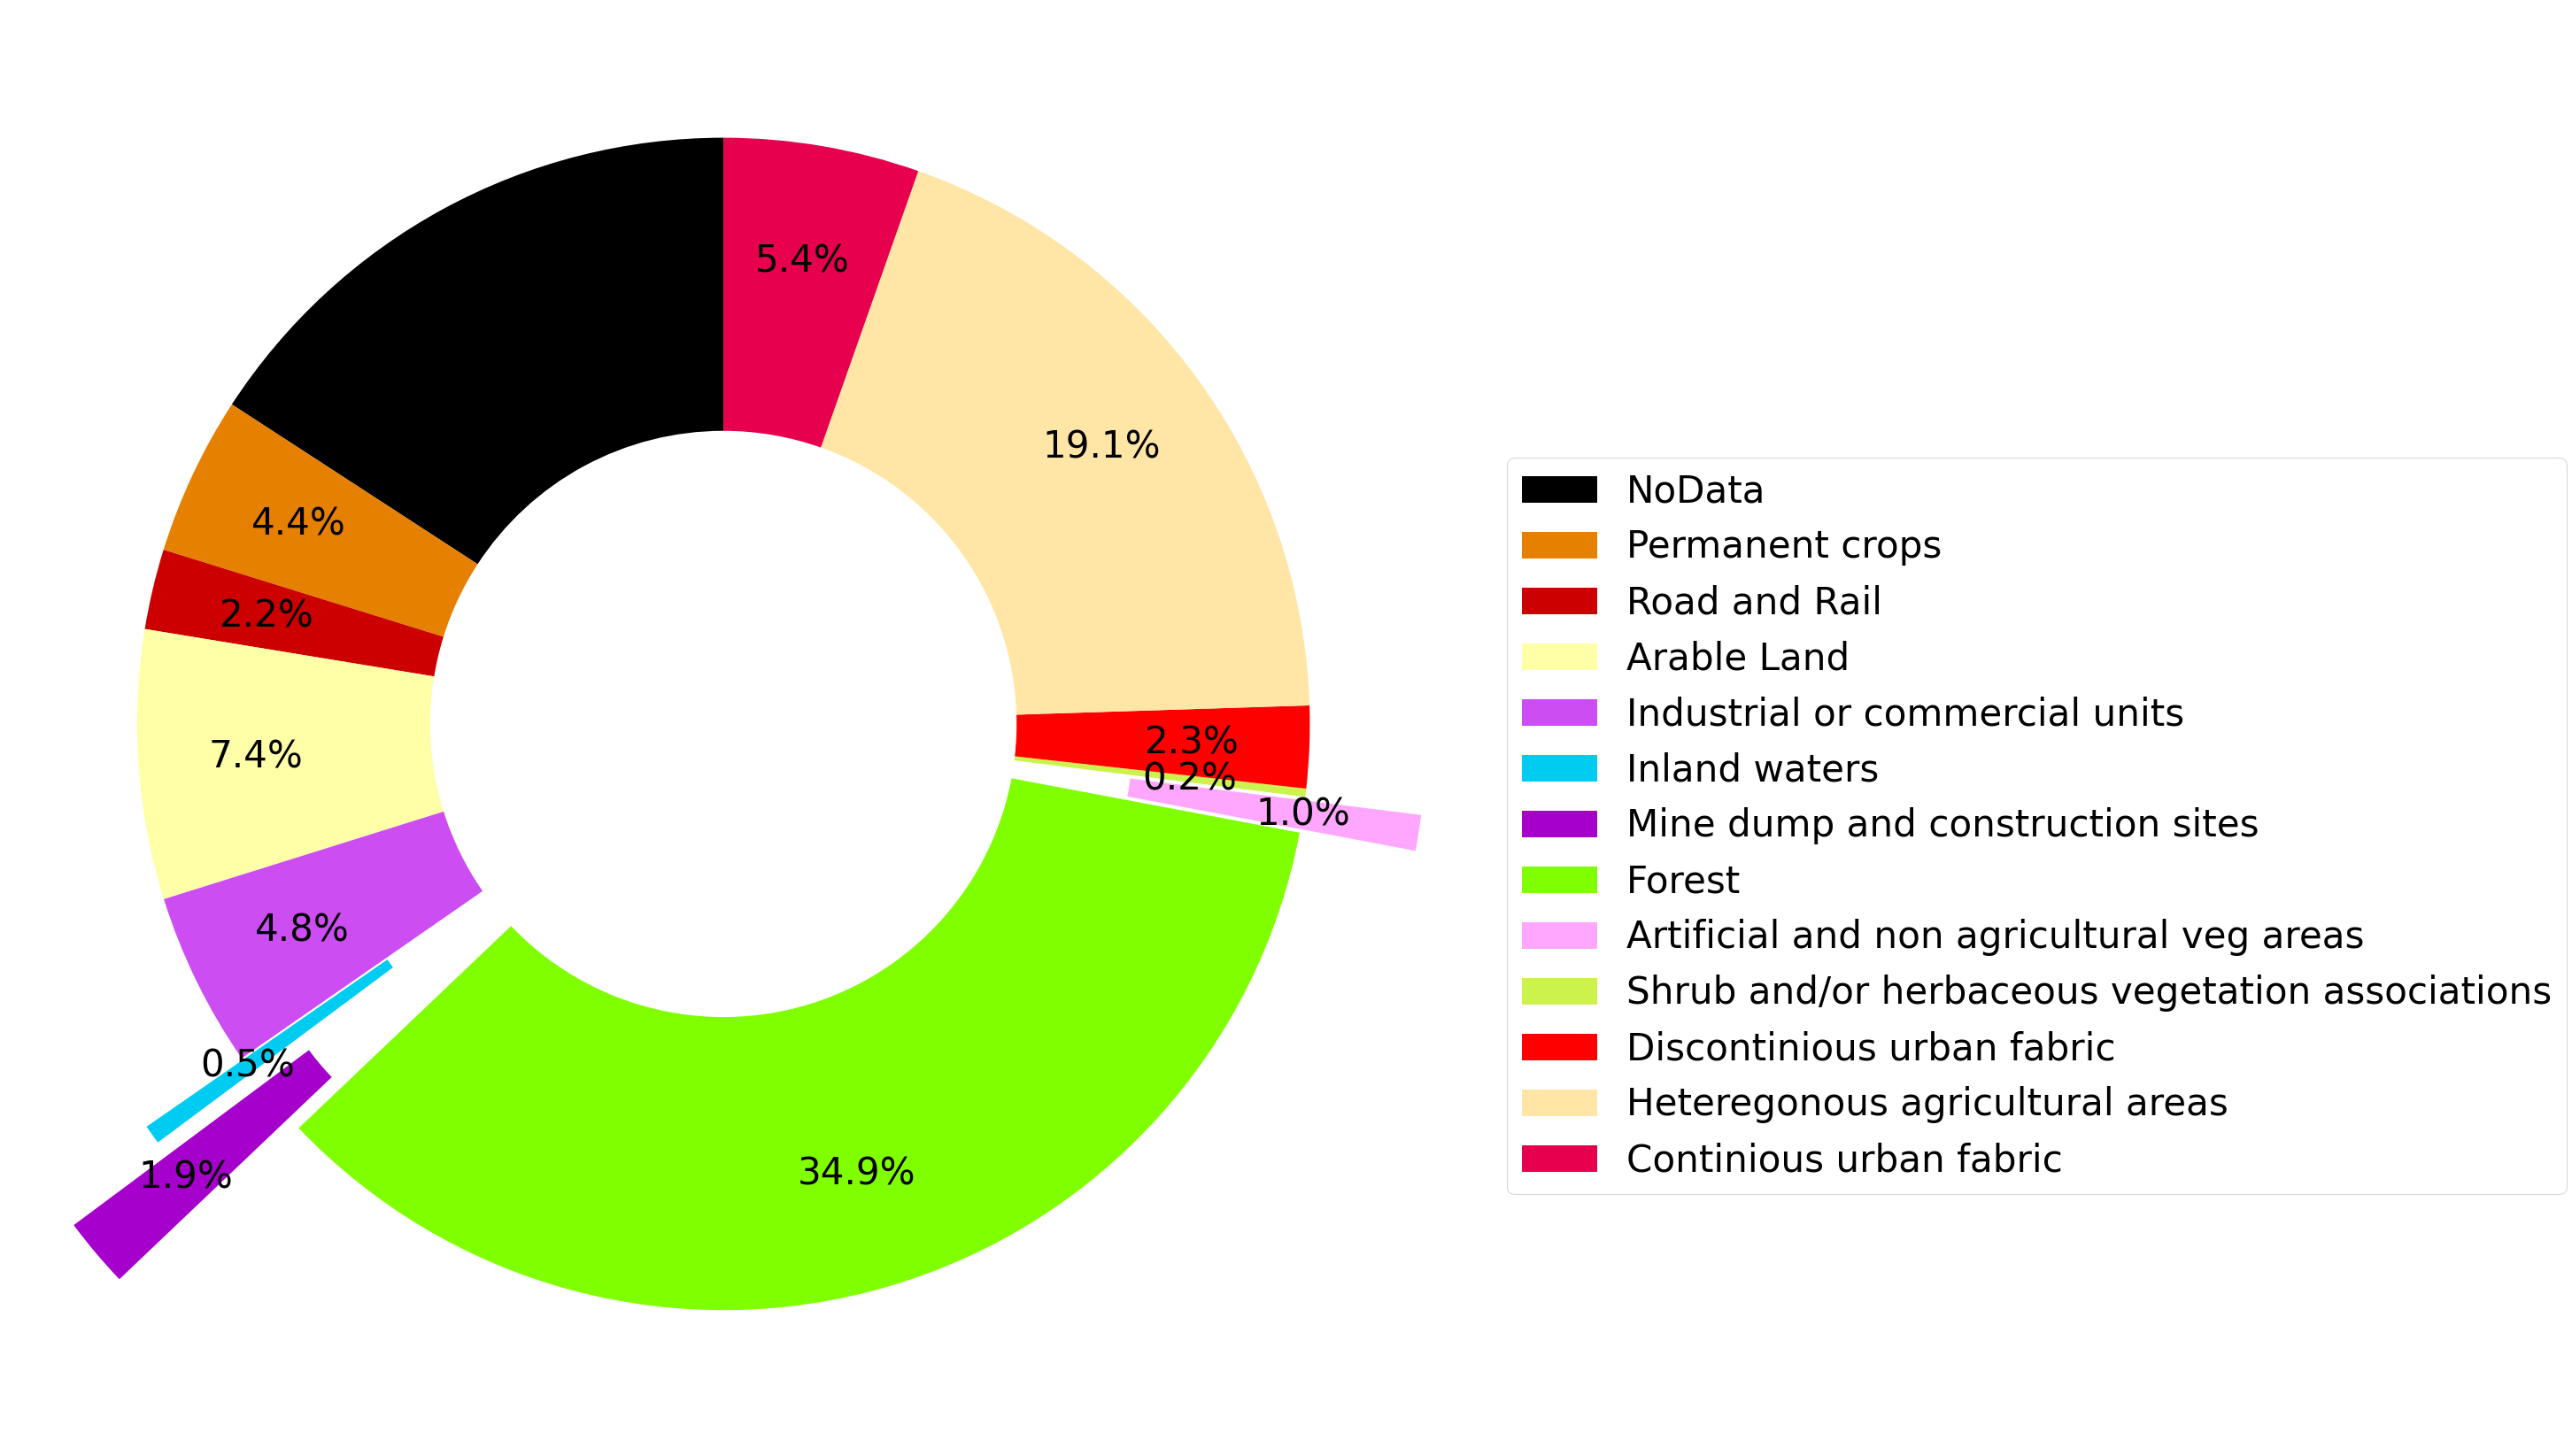

In [12]:
viz_dir = r"C:\Users\CBS-7\Desktop\Tez\Rapor\Visualizations"

#sizes = [24697655,  7511953,  3334977, 11818325,  6393345,   690711,2095109, 56765552,  1649327,   419206,  4403282, 29613599,8941935]
#sizes = [5082076,  2077783,  1334846,  2892513,  1656250,   396369,
#         1483727, 14948882,   573714,   136721,  1628305,  8015082,
#        5124644]
#sizes = [4391404,  905385,  326853, 2984435,  532084,  150000, 8801402,
 #         11285,  145535,  483651, 3002088, 1072406]
sizes = [35841928,  9904250,  5013909, 16805098, 10933851,  1192511,
        4354971, 79099487,  2226774,   510904,  5124418, 43272857,
      12211458]

explode = (0, 0, 0, 0, 0, 0.2,0.4,0,0.2,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = [ (0,0,0), (230, 128, 0), (204, 0, 0), (255, 255, 168),(204, 77, 242), (0, 204, 242),(166, 0, 204), (128, 255, 0), (255, 166, 255), (204, 242, 77), (255, 0, 0),(255,230,166), (230, 0, 77)]

clrs = np.asarray(colors) / 255

labels = ['NoData',
          'Permanent crops',
           'Road and Rail',
           'Arable Land',
            'Industrial or commercial units',
            'Inland waters',
             'Mine dump and construction sites',
            'Forest',
            'Artificial and non agricultural veg areas',
            'Shrub and/or herbaceous vegetation associations',
             'Discontinious urban fabric',
             'Heteregonous agricultural areas',
             'Continious urban fabric'
               ] 


params = {'font.size': 42,
              'xtick.labelsize':32,
              'ytick.labelsize':32}
matplotlib.rcParams.update(params)

fig1, ax1 = plt.subplots()
fig1.set_size_inches(30, 30)

palette = dict(zip(labels, clrs))
handles = [matplotlib.patches.Patch(color=palette[x], label=x) for x in palette.keys()]
matplotlib.rcParams.update(params)
plt.legend(handles=handles,bbox_to_anchor=(1, 0, 0.5, 0.7))

ax1.pie(sizes,
        #labels=labels, 
        autopct='%1.1f%%',
        shadow=False,
        colors = clrs,
        explode = explode,
        wedgeprops=dict(width=0.5),
        startangle=90,
        rotatelabels= True,
        pctdistance = 0.8, 
        labeldistance = 1.0)

ax1.axis('equal')  

#plt.savefig(os.path.join(viz_dir,'Pie_Chart_WHOLE_0.png'), pad_inches = 0, transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
labels = ['1',
               '2',
               '3',
                '4',
                '5',
               '6',
               '7',
                '8',
                '9',
                 '10',
                '11',
                 '12',
                  '13']

In [ ]:
import numpy as np

train = np.array([0.99715511, 0.90765524, 0.73834231, 0.87477249, 0.94563845,
       0.66501521, 0.91602903, 0.9227135 , 0.83859945, 0.07762495,
       0.81806205, 0.95445858, 0.9374273])



In [ ]:
train_percentages = train# [train[i]/np.sum(train) for i in range(len(train))]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib

names = labels
trainvalues = train_percentages

params = {'font.size': 32,
              'xtick.labelsize':32,
              'ytick.labelsize':32}
matplotlib.rcParams.update(params)

fig, axs = plt.subplots(figsize=(42,18), sharey=False)

axs.set_title('Train Set')
axs.bar(names, trainvalues)
plt.setp(axs.get_xticklabels(), rotation=90, ha='center')




### rename the files in the folder

In [ ]:
import os
path = r'C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches\Masks\tif'
path_2 = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches\Images\tif"

files = os.listdir(path)
files_2 = os.listdir(path_2)

for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.tif'])))
    

for index, file in enumerate(files_2):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.tif'])))

In [ ]:

for index, filea in enumerate(files_2):
    os.rename(os.path.join(path_2, filea), os.path.join(path_2, ''.join([str(index), '.tif'])))

In [54]:
import os
import skimage.io
import numpy as np
import glob
import shutil

#####
#original
def _read_img(image_path):
    img = skimage.io.imread(image_path, plugin='tifffile')
    return img

deleted_ids = []

path = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Birlesik\Patches\Masks\tif"
for filename in os.listdir(path):
    img = _read_img(path + '\\' + filename)
    sum_of_pixels = np.sum(img)
    if img.shape[0] != img.shape[1]:
        last = filename.split('.')[0].split('_')[-1]
        #before = filename.split('.')[0].split('_')[-2]
        #id_ = before + '_' + last
        id_ = last
        
        deleted_ids.append(id_)
        os.remove(path + '\\' + filename)